Total rows: 18150
Rows with valid geometry: 18150


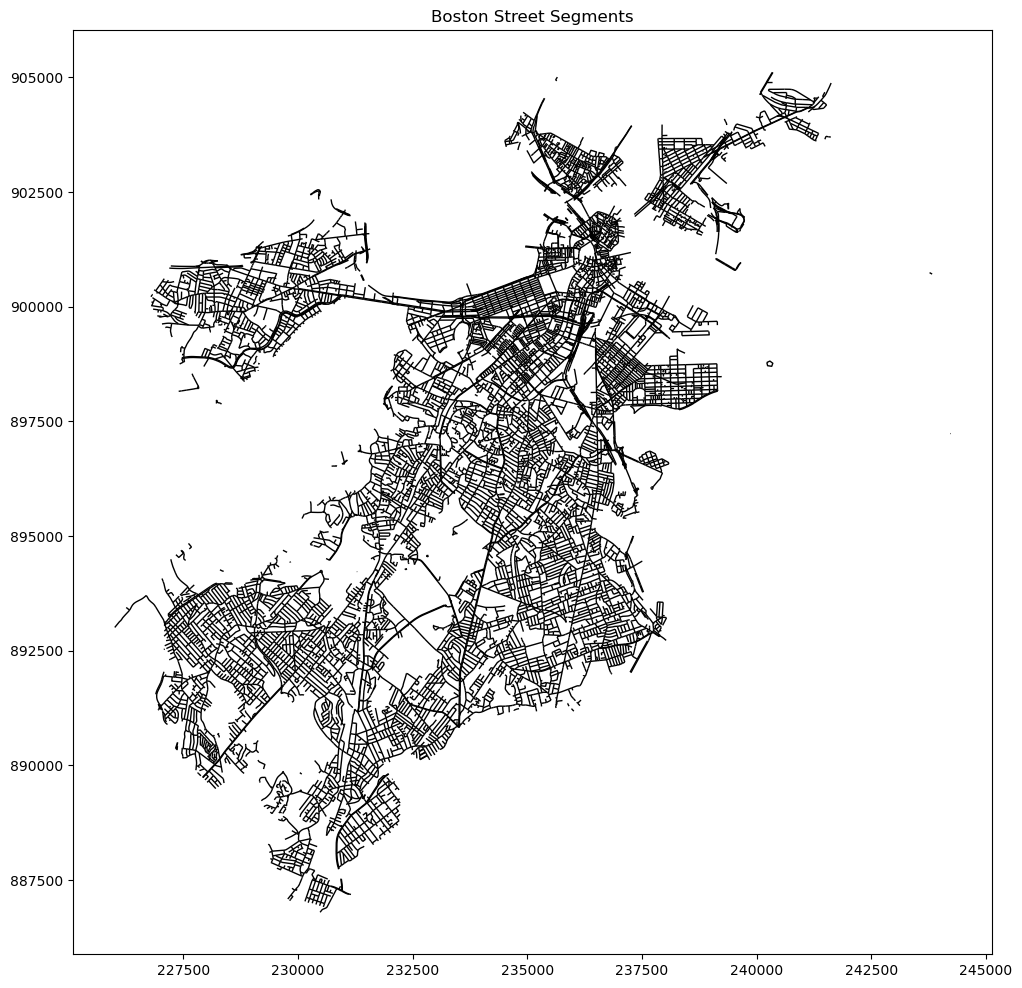

Number of intersections: 11117


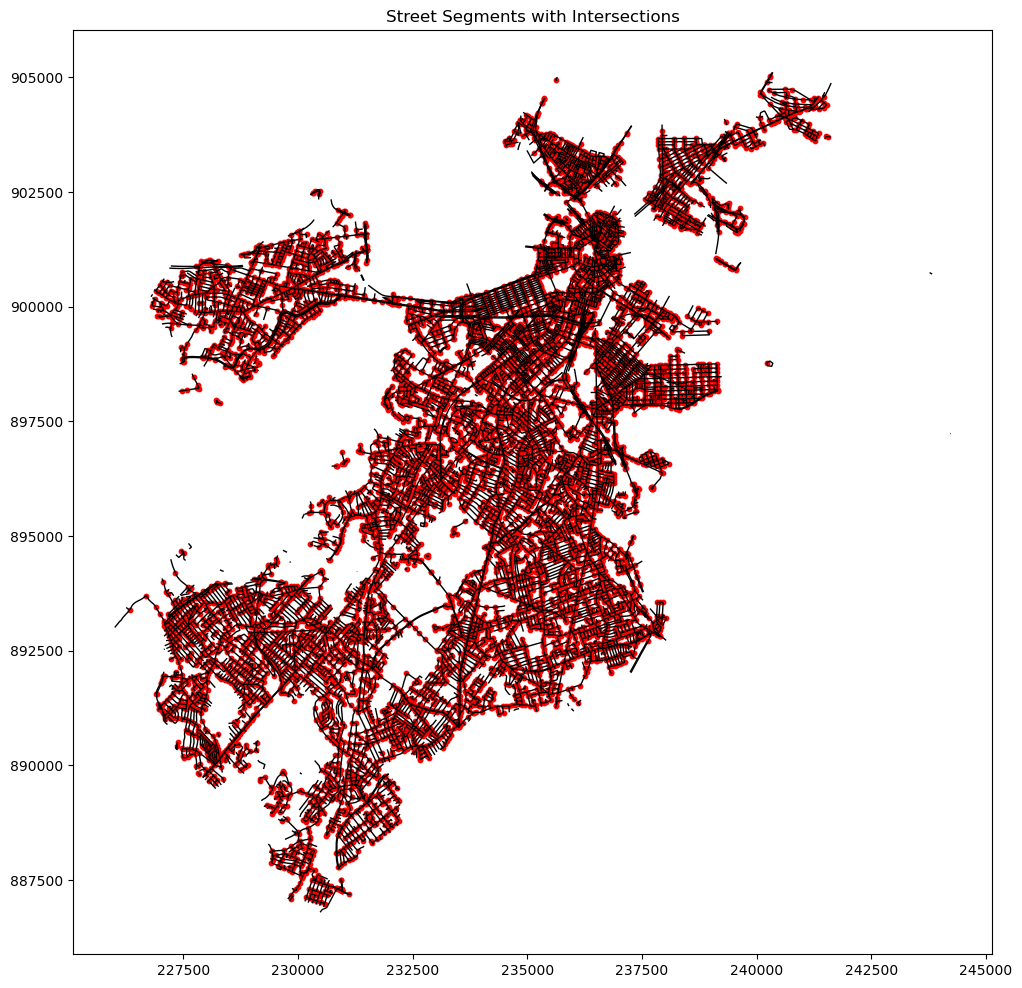

In [1]:
## CHAT GPT USED FOR BELOW CODE FOR CONSTRUCTING GRAPH AND VISUALIZATION
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import LineString, MultiLineString, Point
import networkx as nx
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("boston_street_segments_sam_system.csv")

# Filter out rows with invalid or missing WKT geometry strings
df = df[df["shape_wkt"].notnull() & df["shape_wkt"].apply(lambda x: isinstance(x, str))]

# Convert WKT strings to shapely geometry objects
df["geometry"] = df["shape_wkt"].apply(wkt.loads)

# Create GeoDataFrame with correct CRS (WGS84)
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

print("Total rows:", len(df))
print("Rows with valid geometry:", len(gdf))

# Reproject to NAD83 / Massachusetts Mainland for accurate plotting and measurements
gdf = gdf.to_crs("EPSG:26986")

# Plot the street segments
gdf.plot(figsize=(12, 12), linewidth=1, edgecolor="black")
plt.title("Boston Street Segments")
plt.show()

# Initialize an undirected graph
G = nx.Graph()

# Add edges from street segments to the graph
for idx, row in gdf.iterrows():
    geom = row.geometry
    if isinstance(geom, LineString):
        geoms = [geom]
    elif isinstance(geom, MultiLineString):
        geoms = geom.geoms
    else:
        print(f"Unexpected geometry type at index {idx}: {type(geom)}")
        continue

    for part in geoms:
        start = part.coords[0]
        end = part.coords[-1]
        # Adding edge automatically adds nodes if they don't exist
        G.add_edge(start, end, length=part.length, segment_id=row['SEGMENT_ID'])

# Find intersections: nodes with degree > 1
intersections = [node for node, degree in G.degree if degree > 1]
print(f"Number of intersections: {len(intersections)}")

# Create GeoDataFrame of intersection points
intersections_gdf = gpd.GeoDataFrame(
    geometry=[Point(xy) for xy in intersections],
    crs=gdf.crs
)

# Plot intersections on top of street segments
base = gdf.plot(figsize=(12, 12), linewidth=1, edgecolor="black")
intersections_gdf.plot(ax=base, marker='o', color='red', markersize=10)
plt.title("Street Segments with Intersections")
plt.show()

In [2]:
gdf['NBHD_R'].unique()

array(['SOUTH BOSTON', 'ROXBURY', 'BRIGHTON', 'WEST ROXBURY',
       'JAMAICA PLAIN', 'BOSTON', 'HYDE PARK', 'DORCHESTER', 'ROSLINDALE',
       'CHARLESTOWN', 'MATTAPAN', 'EAST BOSTON', 'SOMERVILLE',
       'HARBOR ISLANDS'], dtype=object)

In [3]:
gdf

,SEGMENT_ID,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,STREET_ID,PRE_DIR,ST_NAME,ST_TYPE,SUF_DIR,...,NBHD_R,STATE00_L,STATE00_R,COUNTY00_L,COUNTY00_R,MCD00_L,MCD00_R,Shape_Length,shape_wkt,geometry
0,1,12.0,22.0,13.0,29.0,2,NaN,A,ST,NaN,...,SOUTH BOSTON,MA,MA,25025,25025,7000,7000,0.000534,MULTILINESTRING ((-71.056734845999983 42.34077...,"MULTILINESTRING ((2.37e+05 8.99e+05, 2.37e+05 ..."
1,2,24.0,42.0,31.0,43.0,2,NaN,A,ST,NaN,...,SOUTH BOSTON,MA,MA,25025,25025,7000,7000,0.000515,MULTILINESTRING ((-71.056324651999944 42.34111...,"MULTILINESTRING ((2.37e+05 8.99e+05, 2.37e+05 ..."
2,3,44.0,64.0,45.0,67.0,2,NaN,A,ST,NaN,...,SOUTH BOSTON,MA,MA,25025,25025,7000,7000,0.000570,MULTILINESTRING ((-71.055938036999976 42.34145...,"MULTILINESTRING ((2.37e+05 8.99e+05, 2.37e+05 ..."
3,4,66.0,72.0,69.0,71.0,2,NaN,A,ST,NaN,...,SOUTH BOSTON,MA,MA,25025,25025,7000,7000,0.000630,MULTILINESTRING ((-71.05550336999994 42.341823...,"MULTILINESTRING ((2.37e+05 8.99e+05, 2.37e+05 ..."
4,5,74.0,90.0,73.0,87.0,2,NaN,A,ST,NaN,...,SOUTH BOSTON,MA,MA,25025,25025,7000,7000,0.000574,MULTILINESTRING ((-71.055019437999988 42.34222...,"MULTILINESTRING ((2.37e+05 8.99e+05, 2.37e+05 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19336,27553,150.0,198.0,149.0,199.0,2103,NaN,Horace,ST,NaN,...,EAST BOSTON,MA,MA,25025,25025,7000,7000,0.000358,MULTILINESTRING ((-71.012166581999963 42.38409...,"MULTILINESTRING ((2.4e+05 9.04e+05, 2.4e+05 9...."
19339,27556,150.0,198.0,151.0,199.0,7637,NaN,Harbor,WAY,NaN,...,SOUTH BOSTON,MA,MA,25025,25025,7000,7000,0.000584,MULTILINESTRING ((-71.045909320999954 42.34981...,"MULTILINESTRING ((2.37e+05 9e+05, 2.37e+05 9e+..."
19340,27557,NaN,NaN,398.0,390.0,979,NaN,Congress,ST,NaN,...,SOUTH BOSTON,MA,MA,25025,25025,7000,7000,0.000963,MULTILINESTRING ((-71.045294960999968 42.34928...,"MULTILINESTRING ((2.37e+05 9e+05, 2.37e+05 9e+..."
19341,27558,1.0,49.0,2.0,48.0,1412,NaN,Empire,ST,NaN,...,BRIGHTON,MA,MA,25025,25025,7000,7000,0.000260,MULTILINESTRING ((-71.129654981999977 42.35803...,"MULTILINESTRING ((2.31e+05 9.01e+05, 2.31e+05 ..."


Shortest path length: 35 nodes


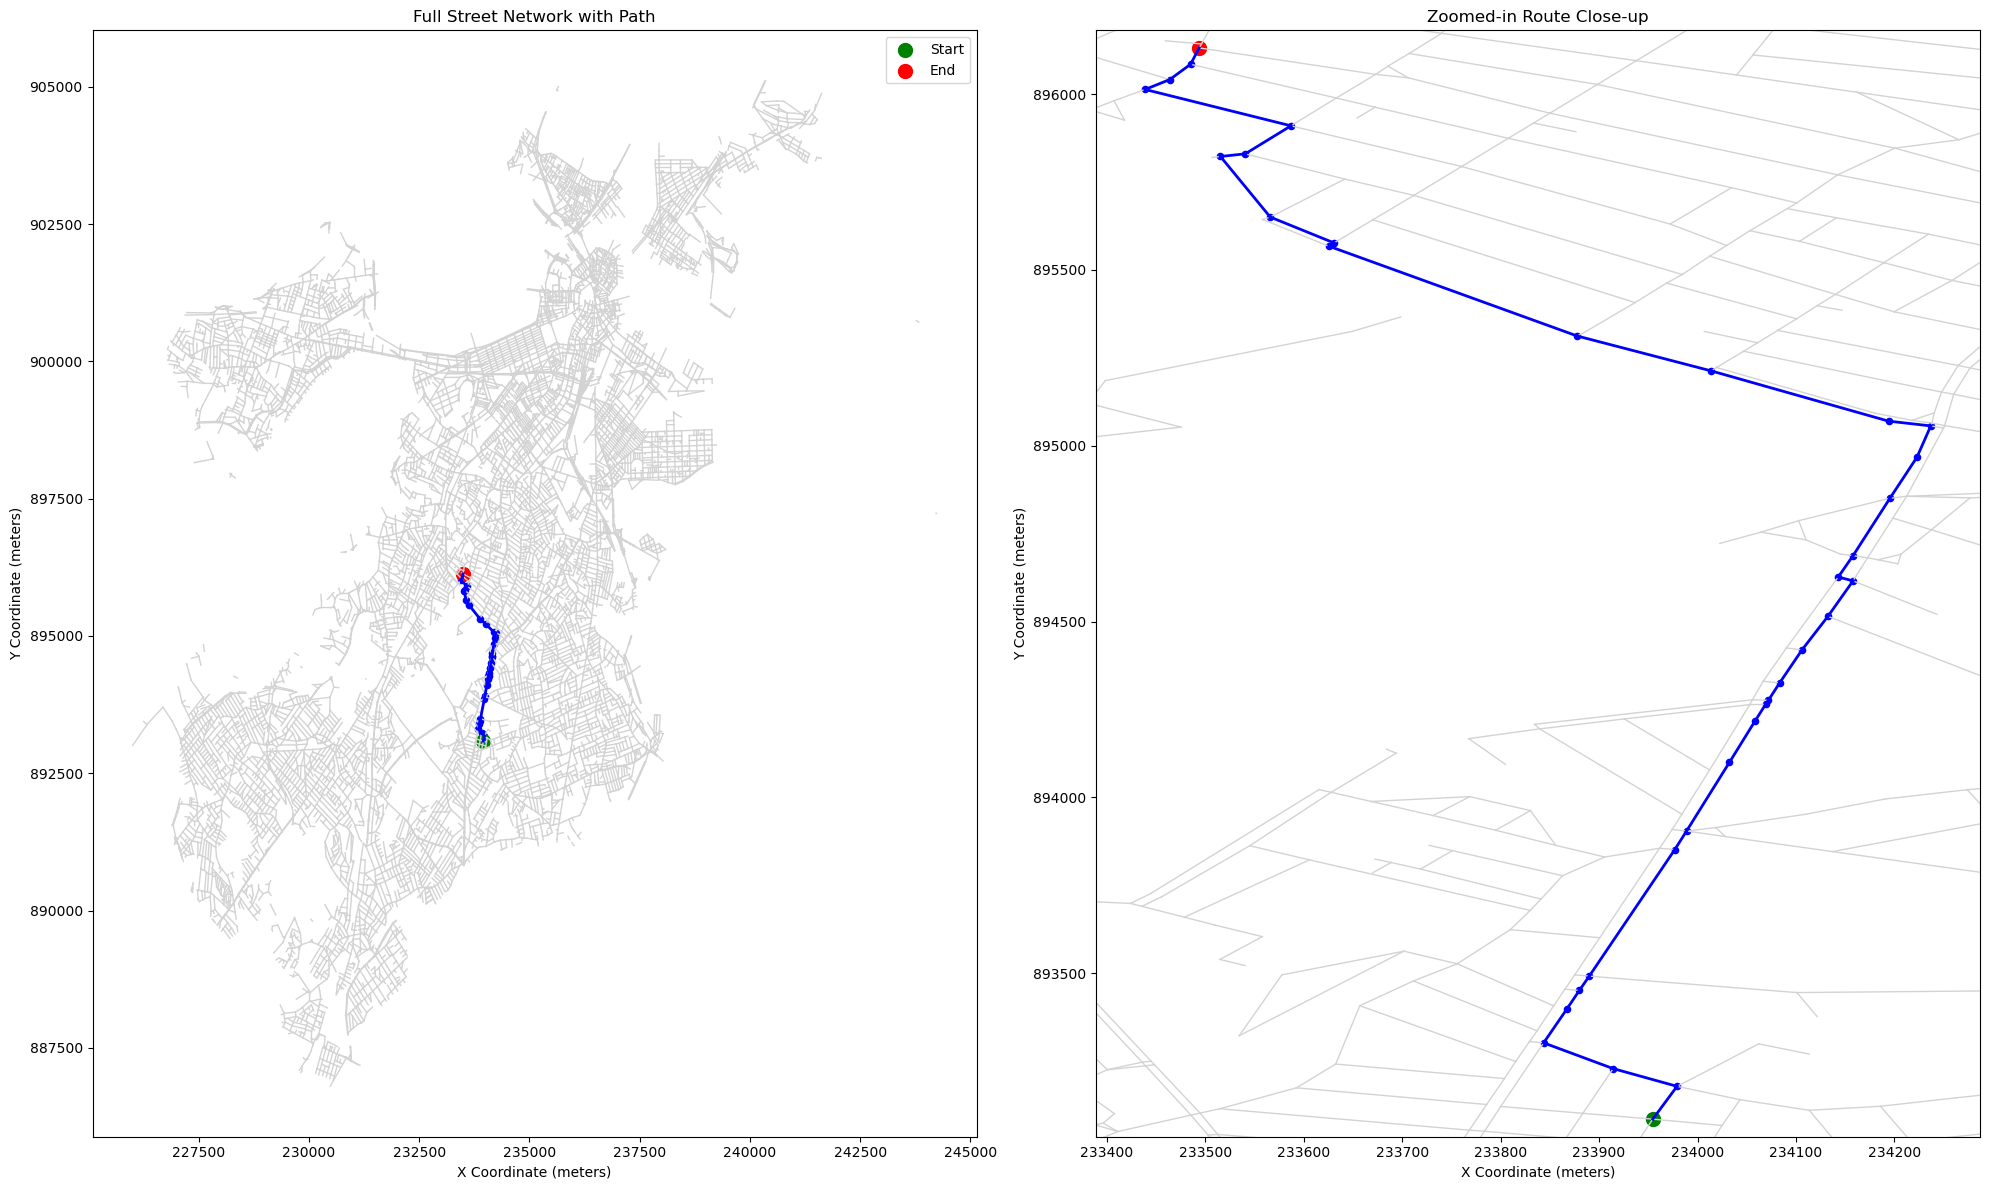

In [4]:
# Example: pick start and end nodes from graph G
start = list(G.nodes)[70]
end = list(G.nodes)[min(10, len(G.nodes)-1)]  # just pick a node within range

# Find shortest path by length
path = nx.shortest_path(G, source=start, target=end, weight='length')
print(f"Shortest path length: {len(path)} nodes")

path_xs = [coord[0] for coord in path]
path_ys = [coord[1] for coord in path]

# Example start, end, path, path_xs, path_ys defined before

fig, axes = plt.subplots(1, 2, figsize=(20, 12))  # 1 row, 2 cols: full and zoom

# --- Plot 1: Full street network ---
ax = axes[0]
ax.set_title("Full Street Network with Path")
for u, v in G.edges():
    x = [u[0], v[0]]
    y = [u[1], v[1]]
    ax.plot(x, y, color='lightgray', linewidth=1)

for i in range(len(path) - 1):
    x = [path[i][0], path[i+1][0]]
    y = [path[i][1], path[i+1][1]]
    ax.plot(x, y, color='blue', linewidth=2)

ax.scatter(path_xs, path_ys, color='blue', s=20)
ax.scatter(*start, color='green', s=100, label='Start')
ax.scatter(*end, color='red', s=100, label='End')
ax.legend()
ax.set_xlabel("X Coordinate (meters)")
ax.set_ylabel("Y Coordinate (meters)")

# --- Plot 2: Zoomed-in close-up on path ---
ax = axes[1]
ax.set_title("Zoomed-in Route Close-up")

for u, v in G.edges():
    x = [u[0], v[0]]
    y = [u[1], v[1]]
    ax.plot(x, y, color='lightgray', linewidth=1)

for i in range(len(path) - 1):
    x = [path[i][0], path[i+1][0]]
    y = [path[i][1], path[i+1][1]]
    ax.plot(x, y, color='blue', linewidth=2)

ax.scatter(path_xs, path_ys, color='blue', s=20)
ax.scatter(*start, color='green', s=100)
ax.scatter(*end, color='red', s=100)

padding = 50
ax.set_xlim(min(path_xs) - padding, max(path_xs) + padding)
ax.set_ylim(min(path_ys) - padding, max(path_ys) + padding)
ax.set_xlabel("X Coordinate (meters)")
ax.set_ylabel("Y Coordinate (meters)")

plt.tight_layout()
plt.show()
